# Magnitude structure for minimizing negative transfer of knowledge in MOGP


Given a number of outputs $M=3$, each one with $Q_{\text{unique}}=3$ latent components, with $Q_{\text{pair}}=1$  pairwise components and $Q_{\text{shared}}=2$ shared components.

This leads to a total of 

\begin{align}
Q_{\text{total}} & = M * Q_u + \binom{M}{2} Q_p + Q_s \\
Q_{\text{total}} & = 3 * 3 + 3 * 1 * + 2 = 14
\end{align}

With this, a binary matrix with the weights has the form:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import itertools
from scipy.special import comb

In [2]:
def create_mask(M, Q_u, Q_p, Q_s):
    # total number of components
    Q = int(Q_u.sum() + Q_s + comb(M, 2) * Q_p)
    W = np.zeros((Q, M))

    # unique
    for i, q in enumerate(Q_u):
        if i==0:
            W[:q, i] = np.ones(q)
        else:
            aux = np.cumsum(Q_u)[i - 1]
            W[aux:aux+q, i] = np.ones(q)

    # pairwise
    if Q_p > 0:
        pairs = list(itertools.combinations(range(M), 2))

        aux = Q_u.sum()
        for p in pairs:
            W[aux:aux+Q_p, p] = np.ones(Q_p)
            aux += Q_p

    # shared
    if Q_s > 0:
        W[-Q_s:] = np.ones((Q_s, M))
    
    return W

In [3]:
# channels
M = 4
# unique
Q_u = np.array([2, 3, 0, 1]) 
# pairwise
Q_p = 2
# shared
Q_s = 3 

W = create_mask(M, Q_u, Q_p, Q_s)

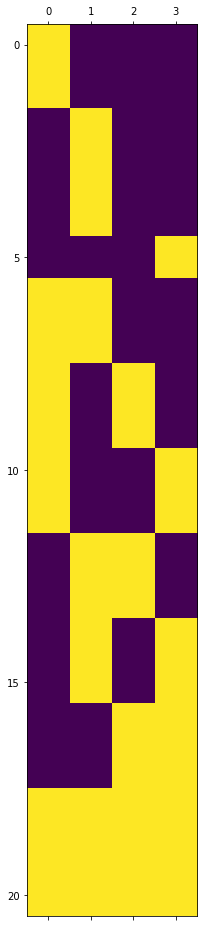

In [4]:
plt.matshow(W)

In [5]:
W.sum(0)

array([11., 12.,  9., 10.])